In [1]:
import statistics as sts
import pandas as pd
import seaborn as srn

In [8]:
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.shape


(14, 5)

In [34]:
dataset.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,85.5,FALSO,sim


In [5]:
dataset.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


In [7]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [11]:
dataset.loc[dataset['Umidade'].isnull()]

,Aparencia,Temperatura,Umidade,Vento,Jogar
3,chuva,70,NaN,FALSO,sim


In [12]:
dataset.loc[dataset['Vento'].isnull()]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [14]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [13]:
medianaUmidade = sts.median(dataset['Umidade'])
medianaUmidade

85.5

In [15]:
dataset['Umidade'].fillna(medianaUmidade, inplace=True)

In [16]:
dataset.loc[dataset['Umidade'].isnull()]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [17]:
dataset['Umidade'].isnull().sum()

0

In [21]:
dataset.loc[dataset['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [20]:
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = medianaUmidade

In [33]:
grupoVento = dataset.groupby(['Vento']).size()
grupoVento

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [32]:
dataset.loc[dataset['Vento'] == 'Falso', 'Vento'] = 'FALSO'

<Axes: xlabel='Vento'>

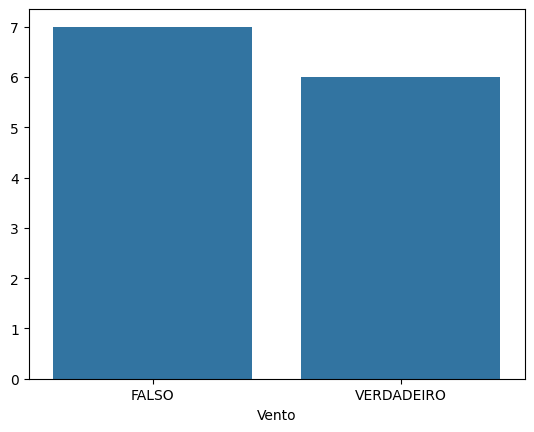

In [29]:
srn.barplot(grupoVento)

In [30]:
dataset['Vento'].fillna('Falso', inplace=True)

In [39]:
dataset.loc[(dataset['Temperatura'] < - 130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [38]:
medianaTemperatura = sts.median(dataset['Temperatura'])

dataset.loc[dataset['Temperatura'] > 130, 'Temperatura'] = medianaTemperatura

In [43]:
grupoAparencia = dataset.groupby(dataset['Aparencia']).size()
grupoAparencia

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [42]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'

In [46]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
